<a href="https://colab.research.google.com/github/AmeerTechsoft/Data-science-project/blob/main/financial_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Preparing the data**

In [ ]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transaction_df = pd.read_csv('./drive/MyDrive/datasets/creditcard.csv') # Reading the dataset

In [ ]:
transaction_df.head() # Printing the first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
transaction_df.columns # Printing the column names of the dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
transaction_df.describe() # Describing the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
transaction_df.isnull().sum() # Checking for null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Count')

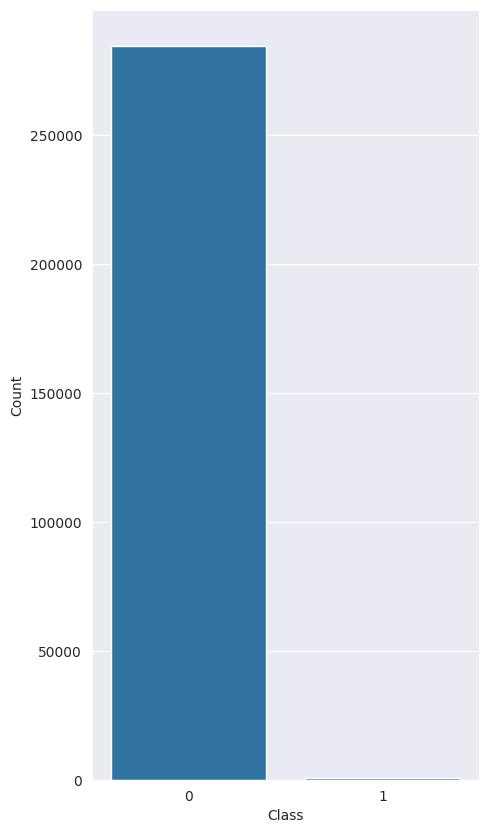

In [ ]:
class_per = transaction_df.groupby('Class').aggregate('count') # Grouping the dataset by class

sns.set_style('darkgrid')
plt.figure(figsize=(5,10))
sns.barplot(x=class_per.index, y=class_per['Amount'])
plt.ylabel('Count')

In [ ]:
# Calculating the percentage of classes in the dataset
fradulent = transaction_df.Class[transaction_df['Class'] == 1]
non_fradulent = transaction_df.Class[transaction_df['Class'] == 0]

fraud_percent = (len(fradulent)/len(transaction_df)) * 100
non_fraud_percent = (len(non_fradulent)/len(transaction_df)) * 100

print(f'Percentage of fradulent transactions : {fraud_percent:.2f}%')
print(f'Percentage of non-fradulent transactions : {non_fraud_percent:.2f}%')

Percentage of fradulent transactions : 0.17%
Percentage of non-fradulent transactions : 99.83%


In [ ]:
transaction_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
scaler = StandardScaler()
transaction_df['Amount'] = scaler.fit_transform(np.array(transaction_df['Amount']).reshape(-1,1))

In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## **2. EDA**

<Axes: >

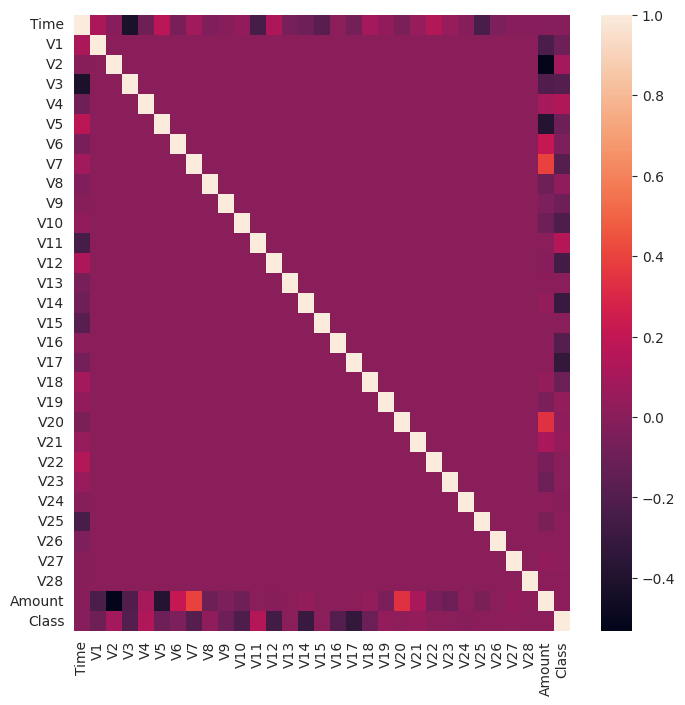

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(transaction_df.corr())


Text(0.5, 1.0, 'Time Density Plot')

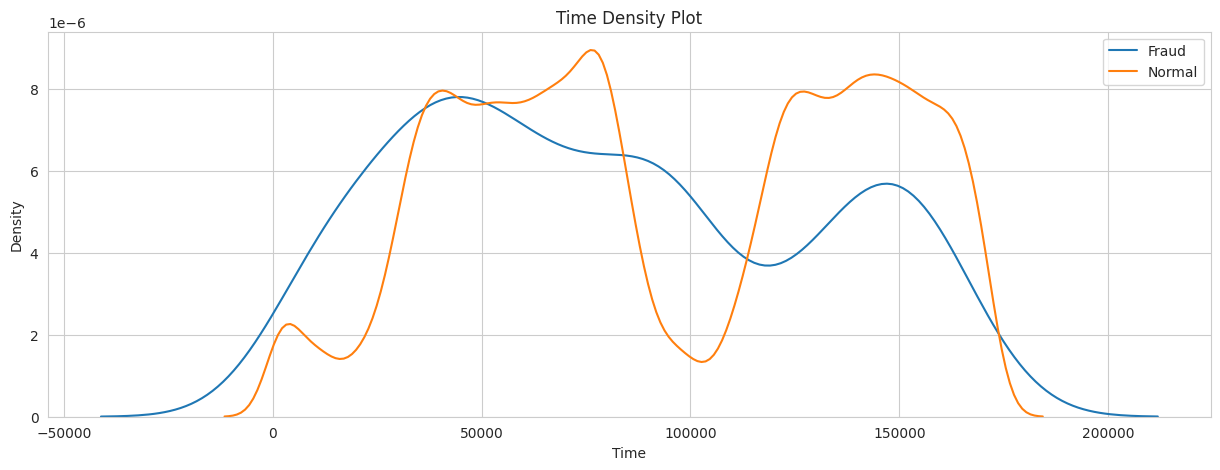

In [ ]:
sns.set_style('whitegrid')
fig = plt.subplots(figsize=(15, 5))

sns.kdeplot(transaction_df[transaction_df['Class'] == 1].Time, label='Fraud')
sns.kdeplot(transaction_df[transaction_df['Class'] == 0].Time, label='Normal')
plt.legend()  # Legend can be placed directly on the plot
plt.title('Time Density Plot')

Text(0.5, 1.0, 'Amount Density Plot')

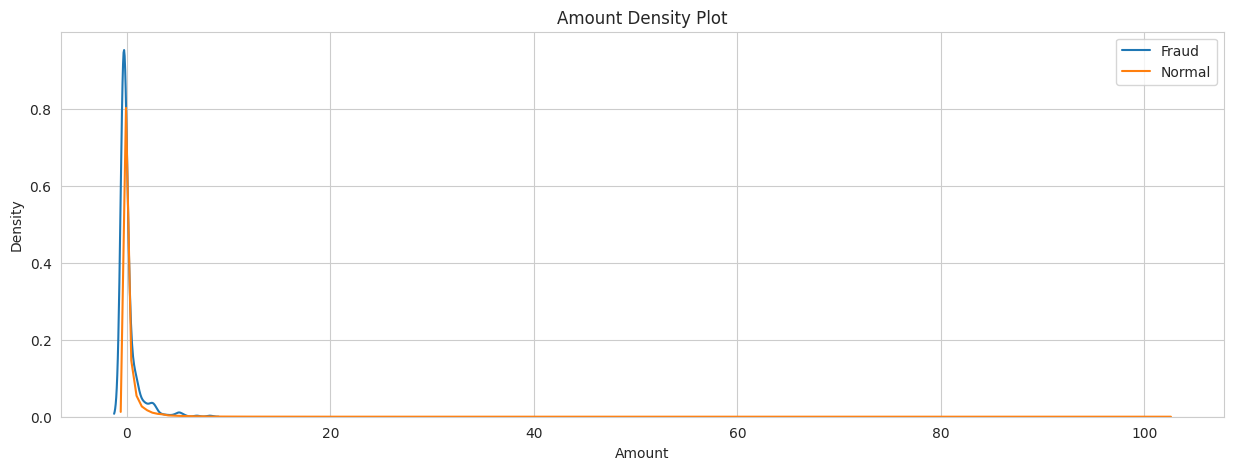

In [ ]:
fig = plt.subplots(figsize=(15, 5))

sns.kdeplot(transaction_df[transaction_df['Class'] == 1].Amount, label='Fraud',)
sns.kdeplot(transaction_df[transaction_df['Class'] == 0].Amount, label='Normal', )
plt.legend()
plt.title('Amount Density Plot')

We are taking 492 available samples of 'Class 1' and joining them with random 500 'Class 0' rows to create a balanced data set for modelling our classifier.

In [ ]:
transaction_df['Time'] = scaler.fit_transform(np.array(transaction_df['Time']).reshape(-1,1))


In [ ]:
X1 = transaction_df[transaction_df['Class'] == 1]
X2 = transaction_df[transaction_df['Class'] == 0].sample(500)
X = pd.concat([X1,X2],axis=0)
X = X.sample(frac=1).reset_index(drop=True)
y = X['Class']
X = X.drop('Class',axis=1)

In [ ]:
print(f' Number of Fraudulent"1" and non-fraudulent"0" Transactions in dataframe \n {y.value_counts()}')

 Number of Fraudulent"1" and non-fraudulent"0" Transactions in dataframe 
 Class
0    500
1    492
Name: count, dtype: int64


In [ ]:
print(f'Total count of Transactions to be used for the training  \n {y.value_counts().sum()}')

Total count of Transactions to be used for the training  
 992


<Axes: xlabel='Class'>

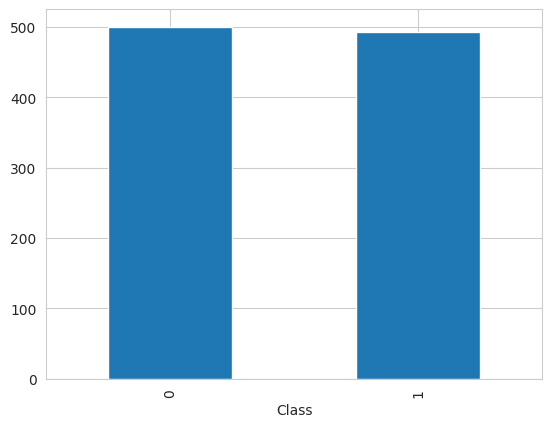

In [ ]:
y.value_counts().plot.bar()

## **3. Training the models**



In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset to training data and test data (80% training, 20% testing)
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2)

print(f'Total size : {X.shape[0]}')
print(f'Training set size : {X_train.shape[0]}')
print(f'Test set size : {X_val.shape[0]}')

Total size : 992
Training set size : 793
Test set size : 199


In [ ]:
# Instantiate the DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_


Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
print(f"Best hyperparameters: {best_params}")

# Cross-validation score of the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")

# Mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print(f"Mean cross-validation score: {mean_cv_score}")

Best hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 30, 'splitter': 'random'}
Cross-validation scores: [0.88050314 0.95597484 0.95597484 0.93037975 0.93670886]
Mean cross-validation score: 0.9319082875567233


In [ ]:
# Build the model with the best parameters
best_model = DecisionTreeClassifier(**best_params)

# Train the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = best_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Print the classification report
print(classification_report(y_val, y_pred))



Accuracy: 85.43
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        87
           1       0.85      0.90      0.87       112

    accuracy                           0.85       199
   macro avg       0.86      0.85      0.85       199
weighted avg       0.85      0.85      0.85       199



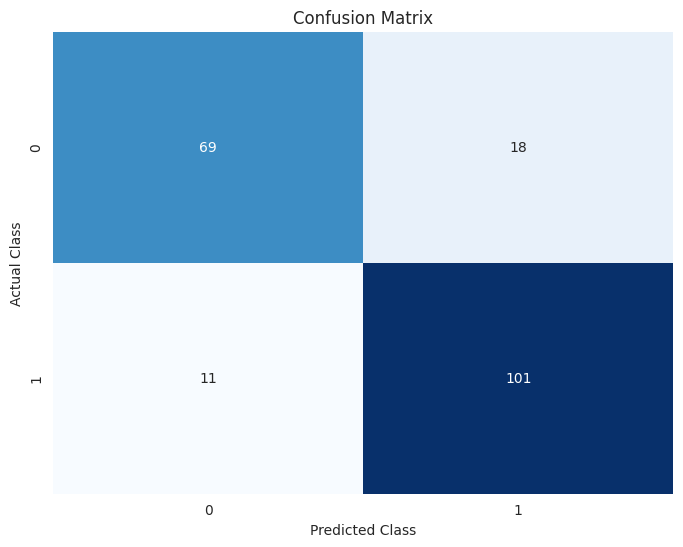

In [ ]:
y_pred = best_model.predict(X_val)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Number of features/predictors
n_features = X_train.shape[1]
n_features

30

In [ ]:
# Building the optimized MLP model
model = models.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=[n_features], kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(units=1, activation='sigmoid')
])

# Compiling the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                992       
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [ ]:
# Stop iteration after 10 epochs if the model performance doesn't improve
early_stopping = EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights=True,
)

In [ ]:
# Training the model and testing with the validation set
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = 32,
    epochs = 100,
    callbacks=[early_stopping],
)

Epoch 1/100
25/25 [==============================] - 2s 15ms/step - loss: 0.9353 - binary_accuracy: 0.5851 - val_loss: 0.6022 - val_binary_accuracy: 0.7387
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6660 - binary_accuracy: 0.7137 - val_loss: 0.4422 - val_binary_accuracy: 0.8945
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5746 - binary_accuracy: 0.7743 - val_loss: 0.3643 - val_binary_accuracy: 0.9246
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4856 - binary_accuracy: 0.8134 - val_loss: 0.3120 - val_binary_accuracy: 0.9447
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4550 - binary_accuracy: 0.8436 - val_loss: 0.2769 - val_binary_accuracy: 0.9497
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3889 - binary_accuracy: 0.8676 - val_loss: 0.2529 - val_binary_accuracy: 0.9497
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - lo

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.935281,0.585120,0.602166,0.738693
1,0.665950,0.713745,0.442212,0.894472
2,0.574630,0.774275,0.364343,0.924623
3,0.485585,0.813367,0.312035,0.944724
4,0.455002,0.843632,0.276878,0.949749
...,...,...,...,...
69,0.195755,0.955864,0.159079,0.959799
70,0.202569,0.952081,0.160410,0.959799
71,0.210976,0.930643,0.158474,0.959799
72,0.183702,0.953342,0.159131,0.959799


Text(0.5, 1.0, 'Accuracy : 95.98')

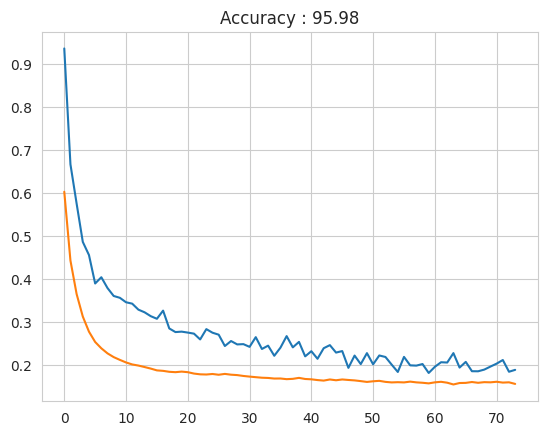

In [ ]:
mlp_accuracy = np.max(history_frame['val_binary_accuracy'])

history_frame['loss'].plot()
history_frame['val_loss'].plot()
plt.title(f'Accuracy : {mlp_accuracy*100:.2f}')

In [ ]:
y_pred_mlp = model.predict(X_val)
y_pred_mlp = np.round(y_pred_mlp)

7/7 [==============================] - 0s 3ms/step


In [ ]:
print(f'Accuracy: {mlp_accuracy*100:.2f}')

# Generate classification report

print('Classification Report:')
print(classification_report(y_val, y_pred_mlp))


Accuracy: 95.98
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        87
           1       1.00      0.93      0.96       112

    accuracy                           0.96       199
   macro avg       0.96      0.96      0.96       199
weighted avg       0.96      0.96      0.96       199



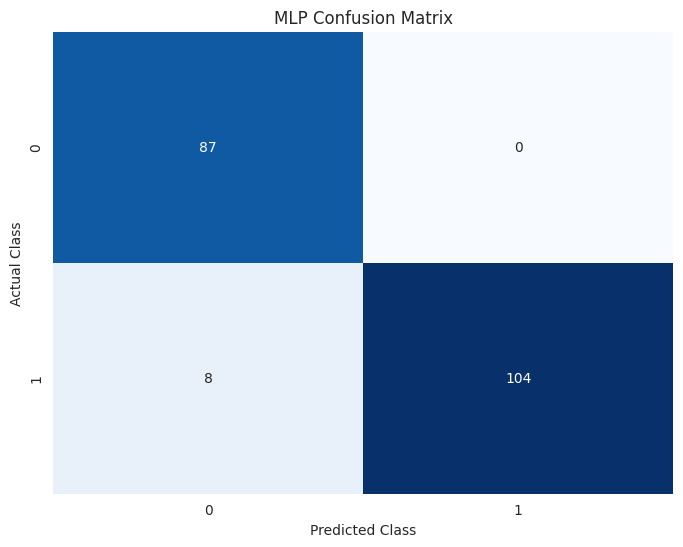

In [ ]:
# a confusion matrix
mlp_cm = confusion_matrix(y_val, y_pred_mlp)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("MLP Confusion Matrix")
plt.show()


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)


In [ ]:
# Perform cross-validation with 5 folds
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f'cross validation scores {scores}')
# Calculate the mean cross-validation score
mean_cv_score = np.mean(scores)

# Print the mean cross-validation score
print(f"Mean cross-validation score: {mean_cv_score}")


cross validation scores [0.91194969 0.96855346 0.94968553 0.94303797 0.91772152]
Mean cross-validation score: 0.9381896345832338


In [ ]:
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg*100:.2f}')
print('Classification Report:')
print(classification_report(y_val, y_pred_logreg))


Logistic Regression Accuracy: 95.48
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        87
           1       1.00      0.92      0.96       112

    accuracy                           0.95       199
   macro avg       0.95      0.96      0.95       199
weighted avg       0.96      0.95      0.95       199



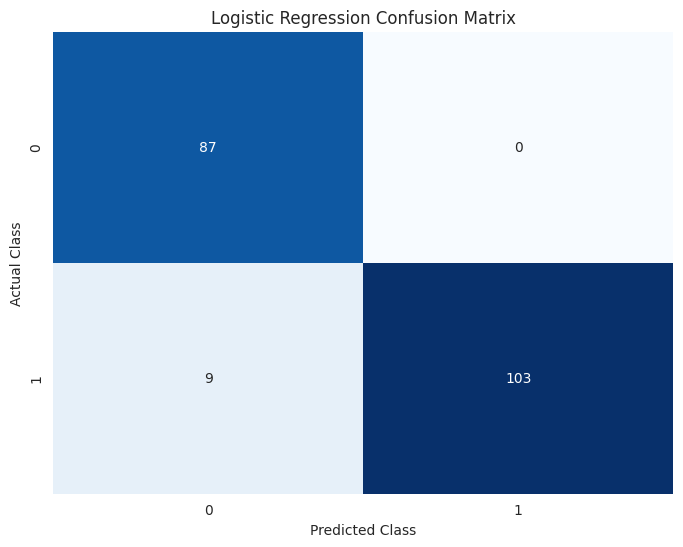

In [ ]:
cm_logreg = confusion_matrix(y_val, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

In [ ]:
# Perform cross-validation with 5 folds
scores = cross_val_score(svm, X_train, y_train, cv=5)
print(f'cross validation scores {scores}')
# Calculate the mean cross-validation score
mean_cv_score = np.mean(scores)

# Print the mean cross-validation score
print(f"Mean cross-validation score: {mean_cv_score}")


cross validation scores [0.89308176 0.94968553 0.94968553 0.92405063 0.93670886]
Mean cross-validation score: 0.9306424647719131


In [ ]:
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm*100:.2f}')
print('Classification Report:')
print(classification_report(y_val, y_pred_svm))

Support Vector Machine Accuracy: 94.97
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        87
           1       1.00      0.91      0.95       112

    accuracy                           0.95       199
   macro avg       0.95      0.96      0.95       199
weighted avg       0.95      0.95      0.95       199



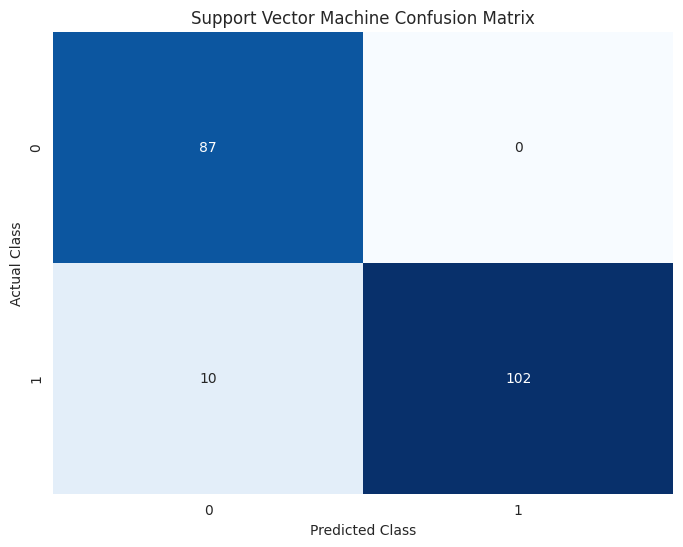

In [ ]:
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

In [ ]:
# Perform cross-validation with 5 folds
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f'cross validation scores {scores}')
# Calculate the mean cross-validation score
mean_cv_score = np.mean(scores)

# Print the mean cross-validation score
print(f"Mean cross-validation score: {mean_cv_score}")


cross validation scores [0.89937107 0.94339623 0.9245283  0.9556962  0.92405063]
Mean cross-validation score: 0.9294084865854628


In [ ]:
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn*100:.2f}')
print('Classification Report:')
print(classification_report(y_val, y_pred_knn))

K-Nearest Neighbors Accuracy: 94.97
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        87
           1       1.00      0.91      0.95       112

    accuracy                           0.95       199
   macro avg       0.95      0.96      0.95       199
weighted avg       0.95      0.95      0.95       199



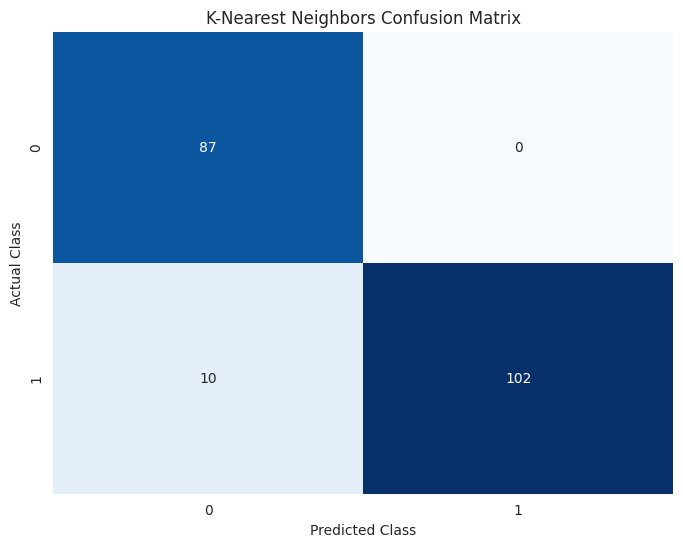

In [ ]:
cm_knn = confusion_matrix(y_val, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

## **4. Results**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC AUC scores for each model
auc_dtc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
auc_mlp = roc_auc_score(y_val, model.predict(X_val))
auc_logreg = roc_auc_score(y_val, logreg.predict_proba(X_val)[:, 1])
auc_svm = roc_auc_score(y_val, svm.predict_proba(X_val)[:, 1])
auc_knn = roc_auc_score(y_val, knn.predict_proba(X_val)[:, 1])

7/7 [==============================] - 0s 2ms/step


In [ ]:
print(f"Decision Tree AUC Score: {auc_dtc*100:.2f}")
print(f"MLP AUC Score: {auc_mlp*100:.2f}")
print(f"Logistic Regression AUC Score: {auc_logreg*100:.2f}")
print(f"SVM AUC Score: {auc_svm*100:.2f}")
print(f"KNN AUC Score: {auc_knn*100:.2f}")


Decision Tree AUC Score: 94.71
MLP AUC Score: 99.12
Logistic Regression AUC Score: 98.77
SVM AUC Score: 99.66
KNN AUC Score: 98.71


In [ ]:
# Calculate the FPR and TPR for each model
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_val, model.predict(X_val))
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_val, logreg.predict_proba(X_val)[:, 1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, svm.predict_proba(X_val)[:, 1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, knn.predict_proba(X_val)[:, 1])


7/7 [==============================] - 0s 3ms/step


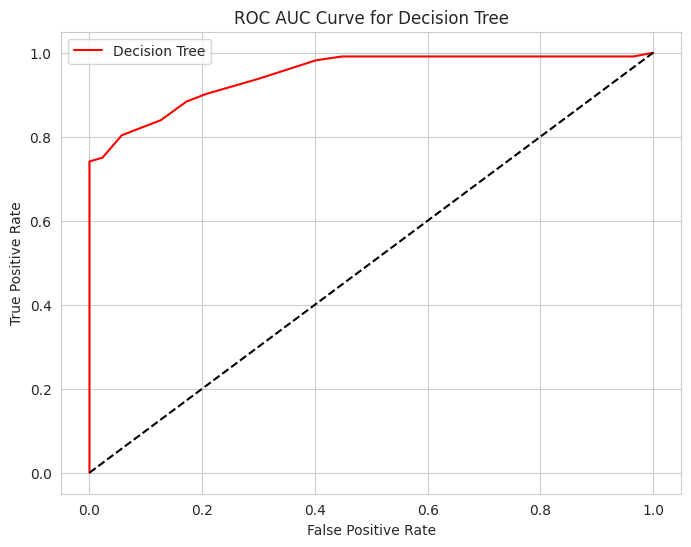

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label="Decision Tree", color="red")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for Decision Tree")
plt.legend()
plt.show()

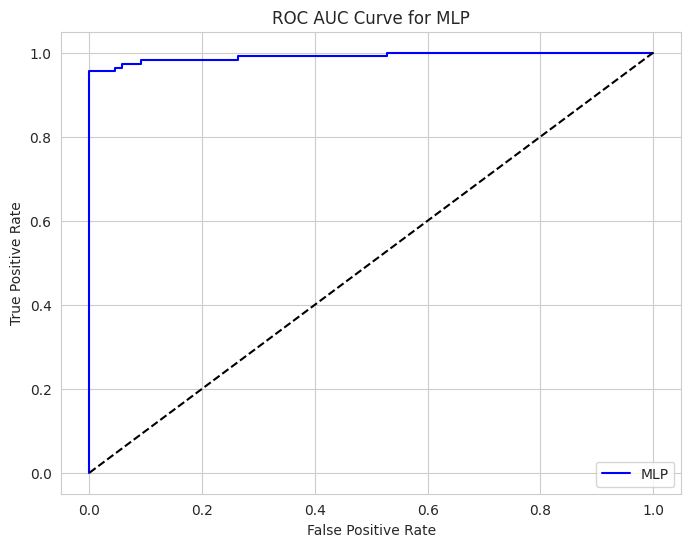

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label="MLP", color="blue")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for MLP")
plt.legend()
plt.show()

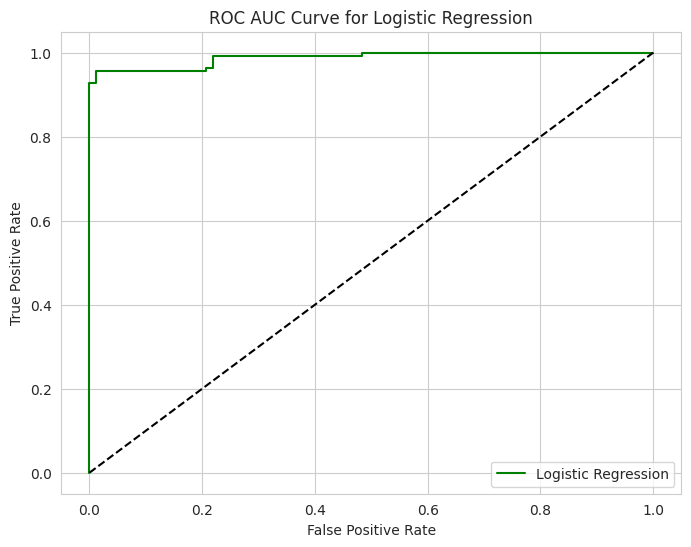

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression", color="green")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for Logistic Regression")
plt.legend()
plt.show()

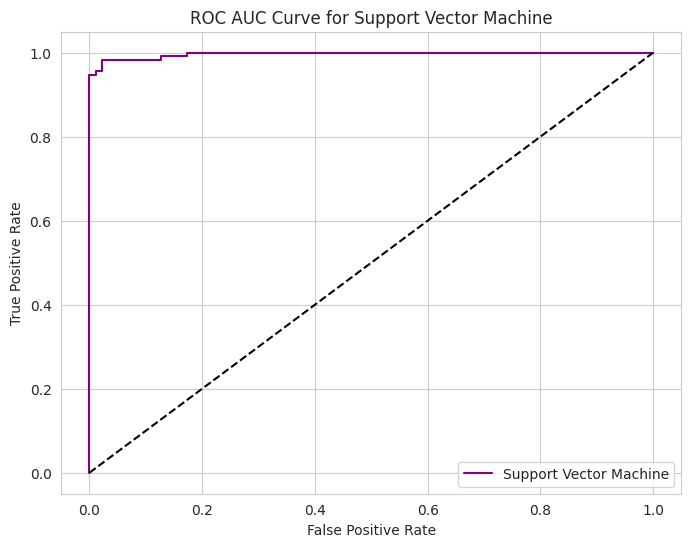

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label="Support Vector Machine", color="purple")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for Support Vector Machine")
plt.legend()
plt.show()

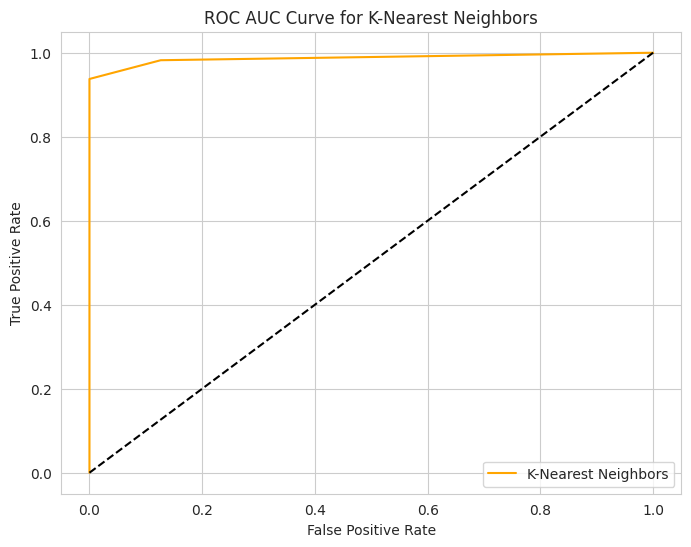

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label="K-Nearest Neighbors", color="orange")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for K-Nearest Neighbors")
plt.legend()
plt.show()

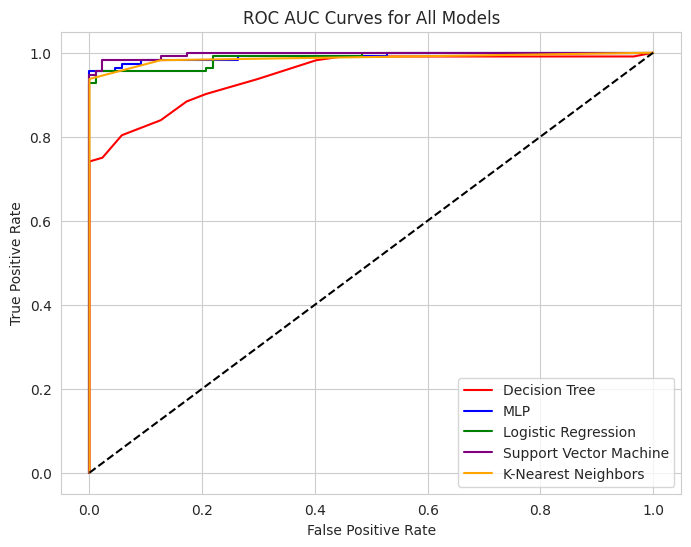

In [ ]:
# Plot the ROC AUC curves for all models together
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label="Decision Tree", color="red")
plt.plot(fpr_mlp, tpr_mlp, label="MLP", color="blue")
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression", color="green")
plt.plot(fpr_svm, tpr_svm, label="Support Vector Machine", color="purple")
plt.plot(fpr_knn, tpr_knn, label="K-Nearest Neighbors", color="orange")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for All Models")
plt.legend()
plt.show()

In [ ]:
import joblib

In [ ]:
# dump models using joblib

joblib.dump(best_model, 'dtc_model.joblib')

['dtc_model.joblib']

In [ ]:
joblib.dump(model, 'mlp_model.joblib')

['mlp_model.joblib']

In [ ]:
joblib.dump(logreg, 'logreg.joblib')

['logreg.joblib']

In [ ]:
joblib.dump(svm, 'svm.joblib')

['svm.joblib']

In [ ]:
joblib.dump(knn, 'knn.joblib')

['knn.joblib']